In [2]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tqdm import tqdm


In [3]:
df = pd.read_csv('../data/cl_papers.csv', index_col=0)
df

,id,title,area,source,year,doi,abstract,semantic_scholar_id
0,main.1004,AnswerFact: Fact Checking in Product Question ...,Question Answering,EMNLP,2020,10.18653/v1/2020.emnlp-main.188,Product-related question answering platforms n...,4c61df1b4b9a164fec1a34587b4fffae029cd18c
1,main.1006,Knowledge-Grounded Dialogue Generation with Pr...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.272,We study knowledge-grounded dialogue generatio...,3447a432f724aa36595643446acda5b78943db19
2,main.1009,BiST: Bi-directional Spatio-Temporal Reasoning...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.145,Video-grounded dialogues are very challenging ...,f4a2acfeb1705df3f430cc53ace26e1dbbbcbd16
3,main.1010,A Knowledge-Aware Sequence-to-Tree Network for...,NLP Applications,EMNLP,2020,10.18653/v1/2020.emnlp-main.579,With the advancements in natural language proc...,24ed85ad966823868c1694a19385d01c6ad71008
4,main.1011,Knowledge Association with Hyperbolic Knowledg...,Information Extraction,EMNLP,2020,10.18653/v1/2020.emnlp-main.460,Capturing associations for knowledge graphs (K...,3d61a28b9429fc8f7047fc379a0134a3765edbcb
...,...,...,...,...,...,...,...,...
9250,T4773,Rank-Aware Negative Training for Semi-Supervis...,Machine Learning for NLP,ACL,2023,10.1162/tacl_a_00574,Abstract Semi-supervised text classification-b...,79a502caa0b12573f56a7e8948459722aa891479
9251,T4777,Transparency Helps Reveal When Language Models...,"Linguistic Theories, Cognitive Modeling, and P...",ACL,2023,10.1162/tacl_a_00565,Many current NLP systems are built from langua...,eee70790ced38b0fcf50351dbb3dcbdb582467e8
9252,T4803,Design Choices for Crowdsourcing Implicit Disc...,Discourse and Pragmatics,ACL,2023,10.1162/tacl_a_00586,Abstract Disagreement in natural language anno...,bf65a1b637e0f253abb8402fc9d0ab80db79aa92
9253,T4929,Time-and-Space-Efficient Weighted Deduction,"Semantics: Sentence-level Semantics, Textual I...",ACL,2023,10.1162/tacl_a_00588,Abstract Many NLP algorithms have been describ...,f1803d124e5af7263ce656f7ccf3219eacc62b1c


In [13]:
def is_interpretability(row):
    if row['year'] < 2020:
        # interpretability and analysis track started in 2020
        return None

    area = row['area'].lower()
    if 'interpretability' in area or 'analysis of language models' in area:
        return True
    
    return False

df['interpretability'] = df.apply(is_interpretability, axis=1)

In [14]:
df_with_interpretability = df[(df['interpretability'] == True) | (df['interpretability'] == False)]
df_with_interpretability

,id,title,area,source,year,doi,abstract,semantic_scholar_id,track,interpretability
0,main.1004,AnswerFact: Fact Checking in Product Question ...,Question Answering,EMNLP,2020,10.18653/v1/2020.emnlp-main.188,Product-related question answering platforms n...,4c61df1b4b9a164fec1a34587b4fffae029cd18c,Question Answering,False
1,main.1006,Knowledge-Grounded Dialogue Generation with Pr...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.272,We study knowledge-grounded dialogue generatio...,3447a432f724aa36595643446acda5b78943db19,Dialogue,False
2,main.1009,BiST: Bi-directional Spatio-Temporal Reasoning...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.145,Video-grounded dialogues are very challenging ...,f4a2acfeb1705df3f430cc53ace26e1dbbbcbd16,Dialogue,False
3,main.1010,A Knowledge-Aware Sequence-to-Tree Network for...,NLP Applications,EMNLP,2020,10.18653/v1/2020.emnlp-main.579,With the advancements in natural language proc...,24ed85ad966823868c1694a19385d01c6ad71008,None,False
4,main.1011,Knowledge Association with Hyperbolic Knowledg...,Information Extraction,EMNLP,2020,10.18653/v1/2020.emnlp-main.460,Capturing associations for knowledge graphs (K...,3d61a28b9429fc8f7047fc379a0134a3765edbcb,Information Extraction,False
...,...,...,...,...,...,...,...,...,...,...
9250,T4773,Rank-Aware Negative Training for Semi-Supervis...,Machine Learning for NLP,ACL,2023,10.1162/tacl_a_00574,Abstract Semi-supervised text classification-b...,79a502caa0b12573f56a7e8948459722aa891479,None,False
9251,T4777,Transparency Helps Reveal When Language Models...,"Linguistic Theories, Cognitive Modeling, and P...",ACL,2023,10.1162/tacl_a_00565,Many current NLP systems are built from langua...,eee70790ced38b0fcf50351dbb3dcbdb582467e8,None,False
9252,T4803,Design Choices for Crowdsourcing Implicit Disc...,Discourse and Pragmatics,ACL,2023,10.1162/tacl_a_00586,Abstract Disagreement in natural language anno...,bf65a1b637e0f253abb8402fc9d0ab80db79aa92,None,False
9253,T4929,Time-and-Space-Efficient Weighted Deduction,"Semantics: Sentence-level Semantics, Textual I...",ACL,2023,10.1162/tacl_a_00588,Abstract Many NLP algorithms have been describ...,f1803d124e5af7263ce656f7ccf3219eacc62b1c,Semantics,False


# Computing embeddings

In [15]:
from transformers import AutoTokenizer
from adapters import AutoAdapterModel
from tqdm import tqdm
tqdm.pandas()

tokenizer = AutoTokenizer.from_pretrained('allenai/specter2_base')

model = AutoAdapterModel.from_pretrained("allenai/specter2_base")
adapter_name = model.load_adapter("allenai/specter2_classification", source="hf", set_active=True)

def get_embedding(paper_row):
    text = paper_row['title'] + tokenizer.sep_token + paper_row['abstract']
    inputs = tokenizer(text,
                       padding=True,
                       truncation=True,
                       return_tensors="pt",
                       return_token_type_ids=False,
                       max_length=2048)
    output = model(**inputs)
    embeddings = output.last_hidden_state[:, 0, :][0].detach().numpy()
    return embeddings

df_with_interpretability['embedding'] = df_with_interpretability.progress_apply(get_embedding, axis=1)

/Users/tom/miniconda3/envs/interpretability-impact/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/tom/miniconda3/envs/interpretability-impact/lib/python3.11/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/tom/miniconda3/envs/interpretability-impact/lib/python3.11/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6994/6994 [14:11<00:00,  8.21it/s]
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_6885/1970831043.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_interpretability['embedding'] = df_with_interpretability.progress_apply(get_embedding, axis=1)


In [23]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch

SEED = 42
SPLIT = 0.2

X = np.stack(df_with_interpretability['embedding'].values)

y = df_with_interpretability['interpretability'].values
y = torch.tensor([1 if label else 0 for label in y], dtype=torch.long)

indices = np.arange(len(df_with_interpretability))
train_indices, test_indices = train_test_split(indices, test_size=SPLIT, random_state=SEED)

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

df_train, df_test = df_with_interpretability.iloc[train_indices], df_with_interpretability.iloc[test_indices]

In [24]:
df_train[df_train['interpretability'] == True]

,id,title,area,source,year,doi,abstract,semantic_scholar_id,track,interpretability,embedding
1919,NaN,FastIF: Scalable Influence Functions for Effic...,Interpretability and Analysis of Models for NLP,EMNLP,2021,10.18653/v1/2021.emnlp-main.808,Influence functions approximate the “influence...,18fb344c9bfd019014996e57c465aa279b7e0151,Interpretability and Analysis,True,"[-1.1471611, -1.6139609, -0.5785974, -0.756649..."
2522,NaN,What Context Features Can Transformer Language...,Interpretability and Analysis of Models for NLP,ACL,2021,10.18653/v1/2021.acl-long.70,Transformer-based language models benefit from...,e1bc348fd7da000da6585e82994ecfedcecb5a4c,Interpretability and Analysis,True,"[-0.372904, 0.28571808, 0.10002303, -1.258752,..."
3274,2256,Language Model Pre-Training with Sparse Latent...,Language Modeling and Analysis of Language Models,EMNLP,2022,10.18653/v1/2022.emnlp-main.96,Modern large-scale Pre-trained Language Models...,cd16a961b16482d4aede6227acaa95183c5c555c,Interpretability and Analysis,True,"[-0.48547608, -0.14370383, -0.3476556, -1.3883..."
1897,NaN,Debiasing Methods in Natural Language Understa...,Interpretability and Analysis of Models for NLP,EMNLP,2021,10.18653/v1/2021.emnlp-main.116,Model robustness to bias is often determined b...,10bc2ba3533bca85b75cb09dcc100809fc3221ea,Interpretability and Analysis,True,"[-0.31337154, 0.22950839, -0.51730245, -1.2140..."
8911,P4975,Contrastive Error Attribution for Finetuned La...,Interpretability and Analysis of Models for NLP,ACL,2023,10.18653/v1/2023.acl-long.643,Recent work has identified noisy and misannota...,6d763d3107bed2ce5ab4a79f1857f47a2e269a41,Interpretability and Analysis,True,"[-0.18097351, 0.13648665, -0.0045430805, -0.94..."
...,...,...,...,...,...,...,...,...,...,...,...
1021,main.311,Roles and Utilization of Attention Heads in Tr...,Interpretability and Analysis of Models for NLP,ACL,2020,10.18653/v1/2020.acl-main.311,Sentence encoders based on the transformer arc...,5b6d03ed66473599ee31872b3cd5ad2ce282371f,Interpretability and Analysis,True,"[-0.10598257, -0.115934625, 0.034281507, -1.54..."
3943,4397,Finding Skill Neurons in Pre-trained Transform...,Language Modeling and Analysis of Language Models,EMNLP,2022,10.18653/v1/2022.emnlp-main.765,Transformer-based pre-trained language models ...,5d3cf0909ba206cd6bc2e86610f77ca25d9b2d1c,Interpretability and Analysis,True,"[0.03446908, -0.49458146, -0.21544456, -1.3379..."
1899,NaN,What’s Hidden in a One-layer Randomly Weighted...,Interpretability and Analysis of Models for NLP,EMNLP,2021,10.18653/v1/2021.emnlp-main.231,"We demonstrate that, hidden within one-layer r...",cebd54ea966172111d08b4f215a73fe84350562e,Interpretability and Analysis,True,"[0.10138122, 0.17559952, -0.0989433, -0.837517..."
4843,518,ViSoBERT: A Pre-Trained Language Model for Vie...,Language Modeling and Analysis of Language Models,EMNLP,2023,10.18653/v1/2023.emnlp-main.315,"English and Chinese, known as resource-rich la...",b44fbb613573f78d444361d7670c8ab130ef9174,Interpretability and Analysis,True,"[-0.9606421, 0.12455705, -0.17797853, -1.30559..."


In [25]:
df[df['semantic_scholar_id'] == '7c23ce3547ae837ff633b14e457a93de6d270b37']

,id,title,area,source,year,doi,abstract,semantic_scholar_id,track,interpretability,embedding
8196,P1299,What Are You Token About? Dense Retrieval as D...,Information Retrieval and Text Mining,ACL,2023,10.18653/v1/2023.acl-long.140,Dual encoders are now the dominant architectur...,7c23ce3547ae837ff633b14e457a93de6d270b37,None,False,"[-1.2692322, -0.4787535, -0.47741634, -1.13703..."


In [26]:
df_train[df_train['semantic_scholar_id'] == '7c23ce3547ae837ff633b14e457a93de6d270b37']

,id,title,area,source,year,doi,abstract,semantic_scholar_id,track,interpretability,embedding
8196,P1299,What Are You Token About? Dense Retrieval as D...,Information Retrieval and Text Mining,ACL,2023,10.18653/v1/2023.acl-long.140,Dual encoders are now the dominant architectur...,7c23ce3547ae837ff633b14e457a93de6d270b37,None,False,"[-1.2692322, -0.4787535, -0.47741634, -1.13703..."


In [27]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)


# we are augmenting the test data with blackboxnlp papers
blackbox_df = pd.read_csv('../data/blackbox_papers.csv', index_col=0)

X_blackbox = np.stack(blackbox_df['embedding'].values) 
X_blackbox = torch.stack([torch.tensor(np.fromstring(x[1:-1], sep='\n'), dtype=torch.float32) for x in X_blackbox])
y_blackbox = blackbox_df['interpretability'].values
y_blackbox = torch.tensor([1 if label else 0 for label in y_blackbox], dtype=torch.long)
X_augmented_train = torch.cat((X_train, X_blackbox), dim=0)
y_augmented_train = torch.cat((y_train, y_blackbox), dim=0)


/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_6885/2530799469.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_6885/2530799469.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim


class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)


    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = torch.softmax(out, dim=-1)
        return out


In [29]:
HIDDEN_SIZE = 400 
BATCH_SIZE = 150
LR = 0.002
INPUT_SIZE = X_train.shape[1]

In [30]:
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
import torch

train_dataset = TensorDataset(X_augmented_train, y_augmented_train)

class_sample_count = np.array([len(np.where(y_augmented_train == t)[0]) for t in np.unique(y_augmented_train)])
weight = 1. / class_sample_count
samples_weight = np.array([weight[t] for t in y_augmented_train])

samples_weight = torch.from_numpy(samples_weight)
samples_weight = samples_weight.double()
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.14it/s]


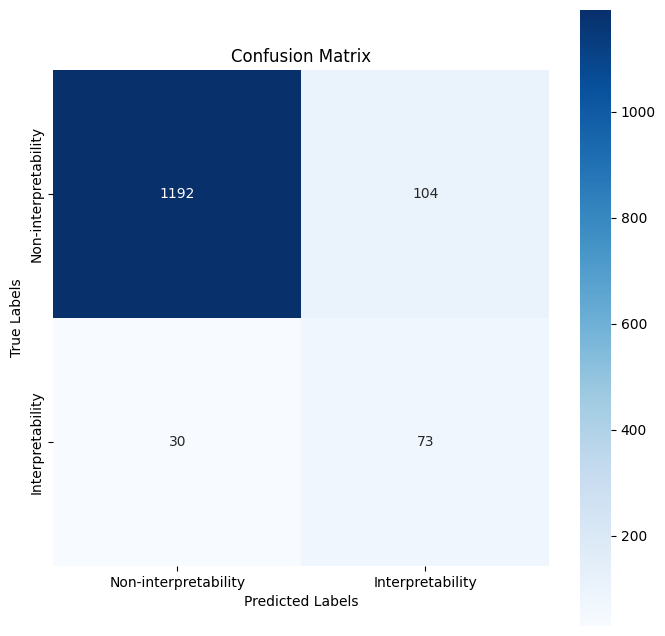

F1 Score: 0.5214285714285715


In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

model = MLPClassifier(INPUT_SIZE, HIDDEN_SIZE, 2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.995)
EPOCHS = 50

for epoch in tqdm(range(EPOCHS)):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()
    
y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.float(), labels.float()
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', square=True)
labels = ['Non-interpretability', 'Interpretability']
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Confusion Matrix')
plt.show()
score = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", score)

In [117]:
KEYWORDS = ['interpretability', 'interpretable', 'dimension', 'subspace', 'inner workings', 'circuit', 'probe', 'probing', 'counterfactual', 'attribution', 'subnetwork', 'intrinsic', 'explanation', 'factual', 'causal', 'role of ', 'why', 'encode', 'underlying', 'explainable', 'shortcut', 'encodings', 'adversarial', 'features', 'align', 'insight']
# Removed keywords (too many false positives): adversarial, representation, analysis, interpret, projection, interpretation, understand, space, mechanism, structure, understanding

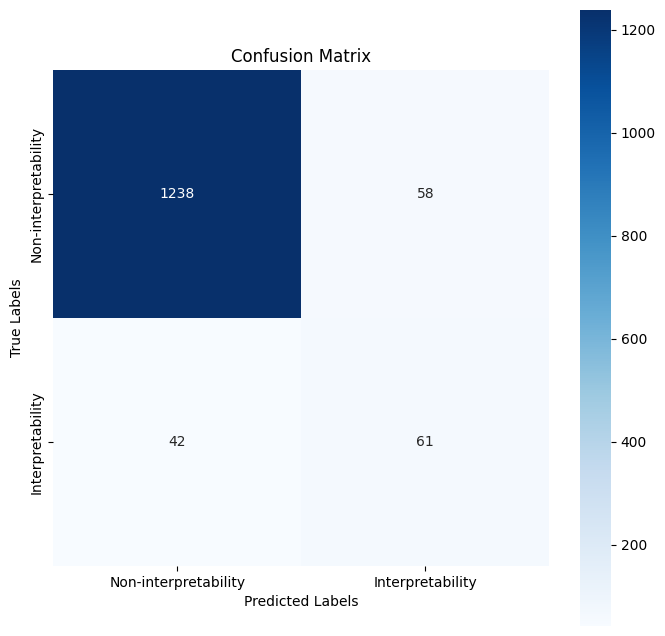

F1 Score: 0.5495495495495496


In [118]:
from sklearn.metrics import f1_score

y_pred = []
y_true = []


model.eval()
with torch.no_grad():
    for index, row in df_test.iterrows():
        vector = row['embedding']
        output = model(torch.tensor(vector))
        pred = torch.argmax(output)
        pred = int(output[1] > 0.5)
        
        has_keyword = any([word in row['abstract'].lower() for word in KEYWORDS])

        y_pred.append(pred and has_keyword)
        y_true.append(row['interpretability'])
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', square=True)
labels = ['Non-interpretability', 'Interpretability']
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Confusion Matrix')
plt.show()
score = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", score)

In [116]:
model.eval()
with torch.no_grad():
    for index, row in df_test.iterrows():
        vector = row['embedding']
        output = model(torch.tensor(vector))
        pred = torch.argmax(output)
        has_keyword = any([word in row['abstract'].lower() for word in KEYWORDS])

        
        if not (pred and has_keyword) and row['interpretability'] and pred:
            print(row['abstract'])
            print('keyword', has_keyword)
            print('pred', output[1])
            print('-' * 50)


Language Models (LMs) pre-trained with self-supervision on large text corpora have become the default starting point for developing models for various NLP tasks. Once the pre-training corpus has been assembled, all data samples in the corpus are treated with equal importance during LM pre-training. However, due to varying levels of relevance and quality of data, equal importance to all the data samples may not be the optimal choice. While data reweighting has been explored in the context of task-specific supervised learning and LM fine-tuning, model-driven reweighting for pre-training data has not been explored. We fill this important gap and propose PRESENCE, a method for jointly reweighting samples by leveraging self-influence (SI) scores as an indicator of sample importance and pre-training. PRESENCE promotes novelty and stability for model pre-training. Through extensive analysis spanning multiple model sizes, datasets, and tasks, we present PRESENCE as an important first step in t

In [119]:
torch.save(model.state_dict(), './classifier-weights.pt')

# Machine Translation Classifier

In [123]:
def is_machine_translation(row):
    area = row['area'].lower()
    if 'translation' in area:
        return True
    
    return False

df['mt'] = df.apply(is_machine_translation, axis=1)

In [19]:
df['embedding'] = df.progress_apply(get_embedding, axis=1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9255/9255 [19:26<00:00,  7.94it/s]


In [133]:
SEED = 42
SPLIT = 0.2

X = np.stack(df['embedding'].values)

y = df['mt'].values
y = torch.tensor([1 if label else 0 for label in y], dtype=torch.long)

indices = np.arange(len(df))
train_indices, test_indices = train_test_split(indices, test_size=SPLIT, random_state=SEED)

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

df_train, df_test = df.iloc[train_indices], df.iloc[test_indices]

In [134]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_66219/2947476391.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_66219/2947476391.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)


In [135]:
HIDDEN_SIZE = 400 
BATCH_SIZE = 150
LR = 0.002
INPUT_SIZE = X_train.shape[1]

In [136]:
train_dataset = TensorDataset(X_train, y_train)

class_sample_count = np.array([len(np.where(y_train == t)[0]) for t in np.unique(y_train)])
weight = 1. / class_sample_count
samples_weight = np.array([weight[t] for t in y_train])

samples_weight = torch.from_numpy(samples_weight)
samples_weight = samples_weight.double()
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.57it/s]


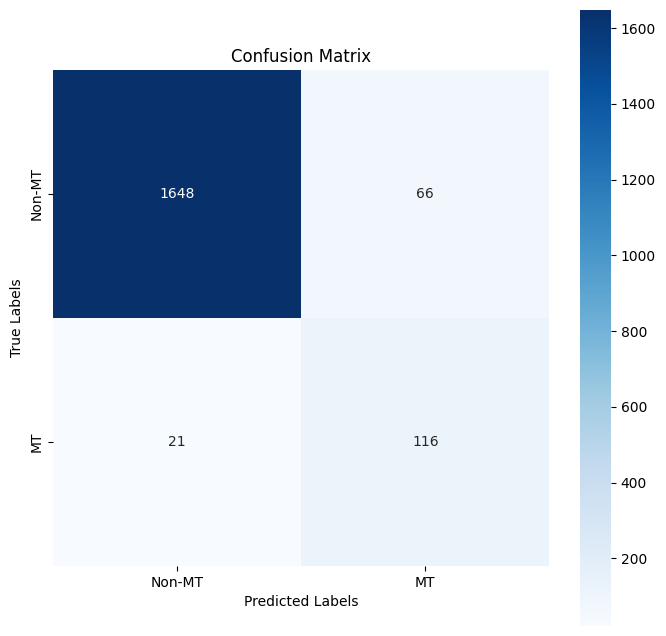

F1 Score: 0.7272727272727273


In [137]:
model = MLPClassifier(INPUT_SIZE, HIDDEN_SIZE, 2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.995)
EPOCHS = 50

for epoch in tqdm(range(EPOCHS)):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()
    
y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.float(), labels.float()
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', square=True)
labels = ['Non-MT', 'MT']
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Confusion Matrix')
plt.show()
score = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", score)

In [138]:
torch.save(model.state_dict(), './mt-classifier-weights.pt')

# Train multiple classifiers

In [5]:
raw_tracks = list(set(df['area']))

In [51]:
analysis_or_interpretability_tracks = list(filter(lambda x: 'interpretability' in x.lower() or 'analysis of language models' in x.lower(), raw_tracks))
print('interp & analysis tracks')
print(analysis_or_interpretability_tracks)
print()

syntax_tracks = list(filter(lambda x: 'syntax' in x.lower(), raw_tracks))
print('syntax tracks')
print(syntax_tracks)
print()

mt_tracks = list(filter(lambda x: 'translation' in x.lower(), raw_tracks))
print('MT tracks')
print(mt_tracks)
print()

grounding_tracks = list(filter(lambda x: 'grounding' in x.lower(), raw_tracks))
print('grounding tracks')
print(grounding_tracks)
print()

semantics_tracks = list(filter(lambda x: 'semantics' in x.lower(), raw_tracks))
print('semantics tracks')
print(semantics_tracks)
print()

evaluation_tracks = list(filter(lambda x: 'evaluation' in x.lower(), raw_tracks))
print('evaluation tracks')
print(evaluation_tracks)
print()

info_extraction_tracks = list(filter(lambda x: 'extraction' in x.lower() or 'retrieval' in x.lower(), raw_tracks))
print('info_extraction tracks')
print(info_extraction_tracks)
print()

qa_tracks = list(filter(lambda x: 'answering' in x.lower(), raw_tracks))
print('qa_tracks')
print(qa_tracks)
print()

dialogue_tracks = list(filter(lambda x: 'dialog' in x.lower(), raw_tracks))
print('dialogue_tracks')
print(dialogue_tracks)
print()

sentiment_analysis_tracks = list(filter(lambda x: 'sentiment analysis' in x.lower(), raw_tracks))
print('sentiment_analysis_tracks')
print(sentiment_analysis_tracks)
print()

applications_tracks = list(filter(lambda x: 'nlp applications' in x.lower(), raw_tracks))
print('applications_tracks')
print(applications_tracks)
print()

ml_tracks = list(filter(lambda x: 'machine learning' in x.lower(), raw_tracks))
print('ml_tracks')
print(ml_tracks)
print()

generation_tracks = list(filter(lambda x: 'generation' in x.lower(), raw_tracks))
print('generation_tracks')
print(generation_tracks)
print()

interp & analysis tracks
['Language Modeling and Analysis of Language Models', 'Interpretability and Analysis of Models for NLP', 'Interpretability, Interactivity and Analysis of Models for NLP', 'Interpretability, Interactivity, and Analysis of Models for NLP']

syntax tracks
['Area D (Morphology, Syntax, Chunking, Psycholinguistics) [LONG]', 'Tagging, Chunking, Syntax and Parsing', 'Syntax, Parsing and their Applications', 'Dialog and Interactive Systems, Machine Translation and Multilinuality, Phonology, Morphology, and Word Segmentation, Speech, Vision, Robotics, Multimodal and Grounding, Tagging, Chunking, Syntax and Parsing', 'Syntax: Tagging, Chunking, and Parsing', 'Syntax, Parsing, and Linguistic Theories', 'Syntax: Tagging, Chunking and Parsing', 'Machine Translation and Mulitilinguality, Phonology, Morphology and Word Segmentation, Tagging, Chunking, Syntax and Parsing']

MT tracks
['Machine Translation, Multilinguality', 'Area G (Machine Translation and Multilinguality) [LO

In [52]:
def raw_track_to_track(raw_track):
    if raw_track in analysis_or_interpretability_tracks:
        return 'Interpretability and Analysis'
    if raw_track in syntax_tracks:
        return 'Syntax'
    if raw_track in mt_tracks:
        return 'Machine Translation'
    if raw_track in grounding_tracks:
        return 'Grounding'
    if raw_track in semantics_tracks:
        return 'Semantics'
    if raw_track in evaluation_tracks:
        return 'Evaluation'
    if raw_track in info_extraction_tracks:
        return 'Information Extraction/Retrieval'
    if raw_track in qa_tracks:
        return 'Question Answering'
    if raw_track in dialogue_tracks:
        return 'Dialogue'
    if raw_track in sentiment_analysis_tracks:
        return 'Sentiment Analysis'
    if raw_track in applications_tracks:
        return 'Applications'
    if raw_track in ml_tracks:
        return 'Machine Learning'
    if raw_track in generation_tracks:
        return 'Generation'
    return None


df['track'] = df['area'].apply(raw_track_to_track)
df

,id,title,area,source,year,doi,abstract,semantic_scholar_id,track,interpretability,embedding
0,main.1004,AnswerFact: Fact Checking in Product Question ...,Question Answering,EMNLP,2020,10.18653/v1/2020.emnlp-main.188,Product-related question answering platforms n...,4c61df1b4b9a164fec1a34587b4fffae029cd18c,Question Answering,False,"[-1.2518485, -0.29460606, -0.8107855, -1.58728..."
1,main.1006,Knowledge-Grounded Dialogue Generation with Pr...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.272,We study knowledge-grounded dialogue generatio...,3447a432f724aa36595643446acda5b78943db19,Dialogue,False,"[-0.34181368, 0.09105819, -0.26983717, -1.2941..."
2,main.1009,BiST: Bi-directional Spatio-Temporal Reasoning...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.145,Video-grounded dialogues are very challenging ...,f4a2acfeb1705df3f430cc53ace26e1dbbbcbd16,Dialogue,False,"[-0.20205598, -0.7245281, -0.19245991, -1.6045..."
3,main.1010,A Knowledge-Aware Sequence-to-Tree Network for...,NLP Applications,EMNLP,2020,10.18653/v1/2020.emnlp-main.579,With the advancements in natural language proc...,24ed85ad966823868c1694a19385d01c6ad71008,Applications,False,"[-0.36777574, 0.07150269, 0.48848996, -1.47894..."
4,main.1011,Knowledge Association with Hyperbolic Knowledg...,Information Extraction,EMNLP,2020,10.18653/v1/2020.emnlp-main.460,Capturing associations for knowledge graphs (K...,3d61a28b9429fc8f7047fc379a0134a3765edbcb,Information Extraction/Retrieval,False,"[-1.421698, 0.30209422, -1.1904925, -0.6410312..."
...,...,...,...,...,...,...,...,...,...,...,...
9250,T4773,Rank-Aware Negative Training for Semi-Supervis...,Machine Learning for NLP,ACL,2023,10.1162/tacl_a_00574,Abstract Semi-supervised text classification-b...,79a502caa0b12573f56a7e8948459722aa891479,Machine Learning,False,"[-1.1633431, -0.48102272, -0.47072205, -0.8523..."
9251,T4777,Transparency Helps Reveal When Language Models...,"Linguistic Theories, Cognitive Modeling, and P...",ACL,2023,10.1162/tacl_a_00565,Many current NLP systems are built from langua...,eee70790ced38b0fcf50351dbb3dcbdb582467e8,None,False,"[-0.29978943, 0.25522044, -0.17783917, -1.1191..."
9252,T4803,Design Choices for Crowdsourcing Implicit Disc...,Discourse and Pragmatics,ACL,2023,10.1162/tacl_a_00586,Abstract Disagreement in natural language anno...,bf65a1b637e0f253abb8402fc9d0ab80db79aa92,None,False,"[-1.1211108, 0.66199553, 0.17070705, -0.508560..."
9253,T4929,Time-and-Space-Efficient Weighted Deduction,"Semantics: Sentence-level Semantics, Textual I...",ACL,2023,10.1162/tacl_a_00588,Abstract Many NLP algorithms have been describ...,f1803d124e5af7263ce656f7ccf3219eacc62b1c,Semantics,False,"[-0.9160983, 0.17695944, 0.10626677, -0.275818..."


In [53]:
tracks_to_create_classifier = ['Syntax', 'Grounding', 'Semantics', 'Information Extraction', 'Question Answering', 'Dialogue', 'Evaluation', 'Sentiment Analysis', 'Applications', 'Machine Learning', 'Generation']

In [56]:
HIDDEN_SIZE = 400 
BATCH_SIZE = 150
LR = 0.002
INPUT_SIZE = 768
SEED = 42
SPLIT = 0.2



/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_6885/3839837987.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_6885/3839837987.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.46it/s]


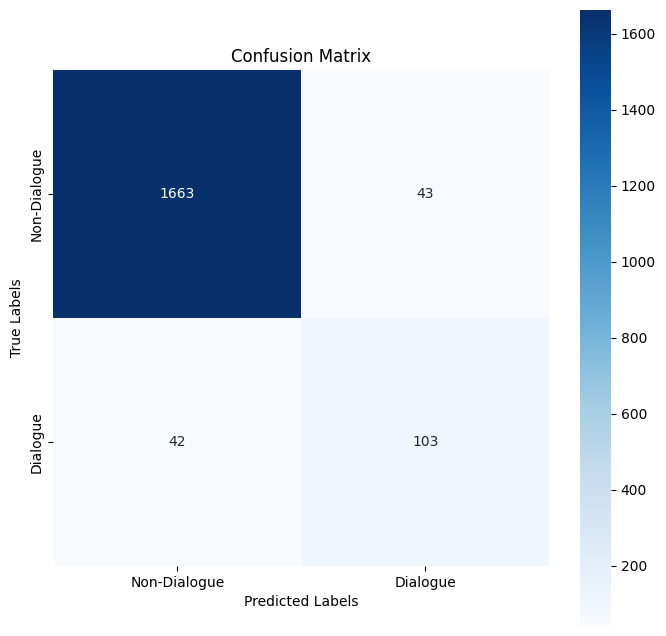

F1 Score: 0.7079037800687286


MLPClassifier(
  (fc1): Linear(in_features=768, out_features=400, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=400, out_features=2, bias=True)
)

In [61]:
from sklearn.metrics import f1_score

def train_classifier(track):
    X = np.stack(df['embedding'].values)

    y = df['track'].values
    y = torch.tensor([1 if label == track else 0 for label in y], dtype=torch.long)
    
    indices = np.arange(len(df))
    train_indices, test_indices = train_test_split(indices, test_size=SPLIT, random_state=SEED)
    
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    df_train, df_test = df.iloc[train_indices], df.iloc[test_indices]
    X_train = torch.tensor(X_train, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.long)
    y_test = torch.tensor(y_test, dtype=torch.long)

    train_dataset = TensorDataset(X_train, y_train)
    
    class_sample_count = np.array([len(np.where(y_train == t)[0]) for t in np.unique(y_train)])
    weight = 1. / class_sample_count
    samples_weight = np.array([weight[t] for t in y_train])
    
    samples_weight = torch.from_numpy(samples_weight)
    samples_weight = samples_weight.double()
    sampler = WeightedRandomSampler(samples_weight, len(samples_weight))
    
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
    
    test_dataset = TensorDataset(X_test, y_test)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
    model = MLPClassifier(INPUT_SIZE, HIDDEN_SIZE, 2)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LR)
    scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.995)
    EPOCHS = 50
    
    for epoch in tqdm(range(EPOCHS)):
        model.train()
        for i, (inputs, labels) in enumerate(train_loader):
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        scheduler.step()
        
    y_pred = []
    y_true = []
    
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.float(), labels.float()
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            y_pred.extend(predicted.numpy())
            y_true.extend(labels.numpy())
    
    cm = confusion_matrix(y_true, y_pred)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', square=True)
    labels = ['Non-' + track, track]
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_title('Confusion Matrix')
    plt.show()
    score = f1_score(y_true, y_pred, average='binary')
    print("F1 Score:", score)
    return model

train_classifier('Dialogue')

/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_6885/286480518.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_6885/286480518.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.26it/s]


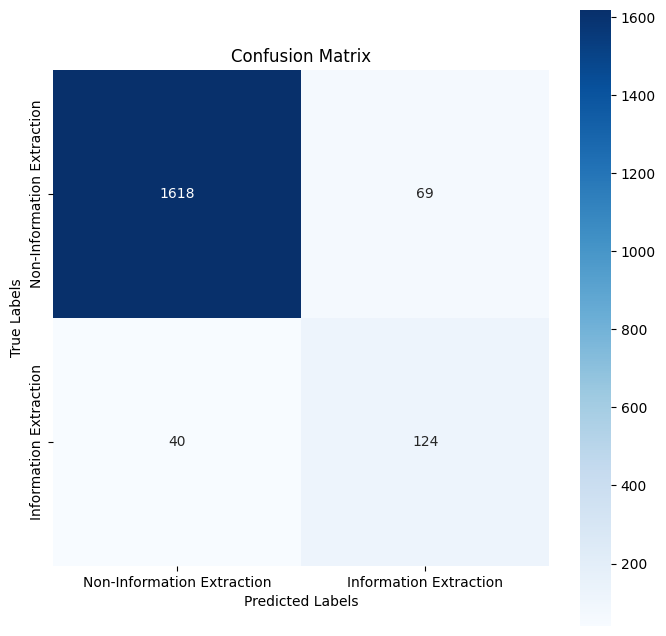

F1 Score: 0.6946778711484594


In [39]:
good_classifiers_tracks = ['Information Extraction', 'Dialogue']

model = train_classifier('Information Extraction')
torch.save(model.state_dict(), './info-extraction-classifier-weights.pt')

/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_6885/3839837987.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_6885/3839837987.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 13.40it/s]


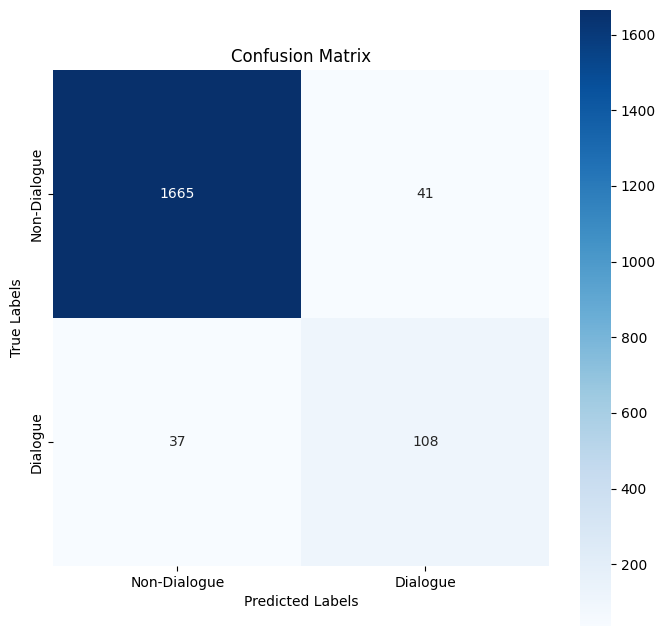

F1 Score: 0.7346938775510204


In [62]:
model = train_classifier('Dialogue')
torch.save(model.state_dict(), './dialogue-classifier-weights.pt')

In [64]:
len(df[pd.isna(df['track'])]) / len(df)

0.20875202593192868